# A Family of B-Splines

A B-splines is a finite-support function that is even-symmetric and blob-shaped.
We now plot the first ten members of the family of B-splines, as ordered
by their degree.

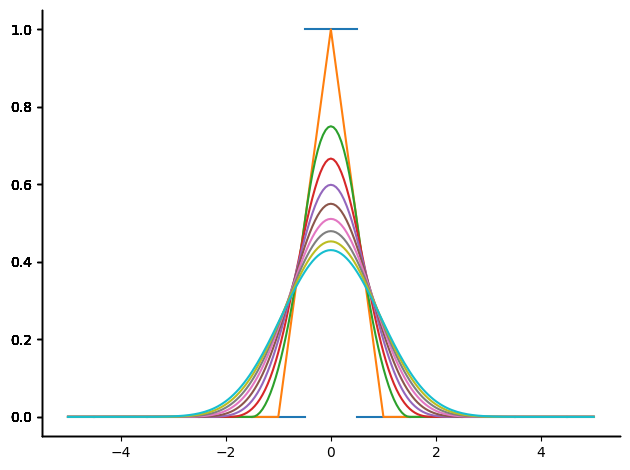

In [1]:
# Load the required libraries.
import matplotlib.pyplot as plt
import splinekit as sk # This library

# Setup
highest_degree = 9
largest_supp = sk.b_spline_support(highest_degree)
period = int(largest_supp.diameter)
subplot = plt.subplots()
# One plot per degree
for degree in range(highest_degree + 1):
    # Construct a spline from a non-overlapping periodic B-spline
    s = sk.PeriodicSpline1D.periodized_b_spline(
        period = period,
        degree = degree
    )
    # Add the plot of the B-spline, with reduced cluttering
    s.plot(
        subplot,
        plotdomain = sk.interval.Open((-0.5 * period, 0.5 * period)),
        plotrange = sk.interval.Closed((-0.05, 1.05)),
        plotpoints = 201,
        line_fmt = "-C" + str(degree), # Distinguish degrees by color
        marker_fmt = "", # No markers at the integers
        stem_fmt = "None", # No stems at the integers
        knot_marker = "", # No knots at the integers
        periodbound_marker_fmt = "", # No marker at the period bounds
        periodbound_stem_fmt = "None" # No stem at the period bounds
    )
plt.show()